In [71]:
#%matplotlib notebook
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.stats as st

def gaussian_kernel(kernlen=21, sig=2.):
    '''defines a Gaussian kernel matrix'''
    x = np.linspace(-1., 1., kernlen+1)
    kern1d = st.norm.pdf(sig*x)
    kern2d = np.outer(kern1d, kern1d)              # outer product(x,y) = x @ y' , this is our trick for separable kernels
    return kern2d/kern2d.sum()

---
#### P1b: Window-based transforms, convolutions and kernels

---
<div class="alert alert-info">
<p>
University of Applied Sciences Munich<br>
Dept of Electrical Enineering and Information Technology<br>
Institute for Applications of Machine Learning and Intelligent Systems (IAMLIS)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(c) Alfred Schöttl 2023<br>
</p>
</div>

---
In this notebook, we will investigate convolutions and use them to sharpen to an image (by a so-called unsharp mask).

In [72]:
fn = './imgs/poppiesgray.jpg'

### 1. Read the image
Read in the image `img` as gray-scale image (use the option `cv2.IMREAD_GRAYSCALE`), rescale it to 0..1 and plot the result. You should see a slightly blurred image of a meadow.

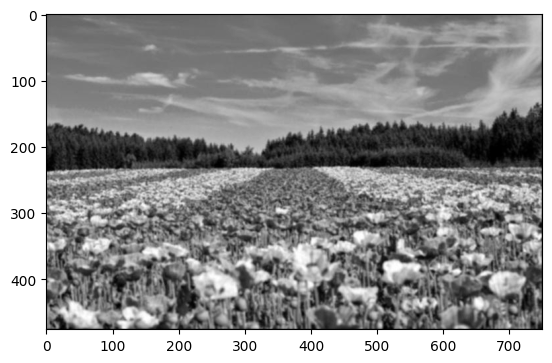

In [73]:
img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)/255
plt.imshow(img, cmap='gray')

### 2. Blur the image
Start by defining a kernel for the linear filter. Let `kernel_size` be the width and height of the kernel. 

- Construct a kernel `kernel` with with equal entries first. Use `np.ones((kernel_size, kernel_size))` to create a matrix of ones. Print the values of the kernel.

- There is a function `gaussian_kernel` already defined for you. Try to understand its arguments by experimenting with it and printing out the the kernel values.

In [78]:
kernel_size = 25
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

Now use the OpenCV function `cv2.filter2D(img, -1, kernel)` to perform the convolution. Store the result in `img_mod` and display the result. Check if you obtained an image which is even more blurred.

Play with various kernel sizes and different kernel types.

_Remark_: The -1 in `filter2D` stands for: the result of the filtering has the same number of channels as the input.

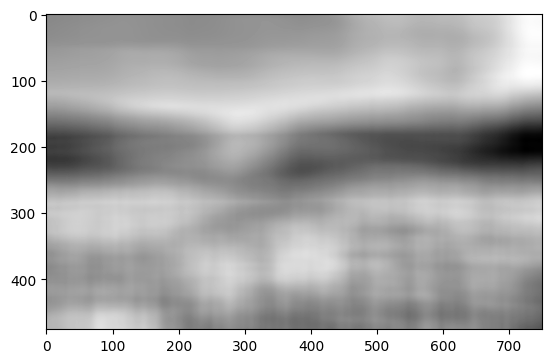

In [75]:
img_mod = cv2.filter2D(img, -1, kernel)
plt.imshow(img_mod, cmap='gray')

### 3. Sharpen the image
A nice possibility to slightly sharpen an image is to apply an _unsharp mask_ (but don't expect too much!). The first step is to extract edges by considering the difference between the original image and the blurred image. Take the absolute value (use `np.abs`) of the image difference and scale it appropriately (multiply it by a constant) so that you can see the edges clearly. Clip the result to 0..1 and store it in the image `edges`.

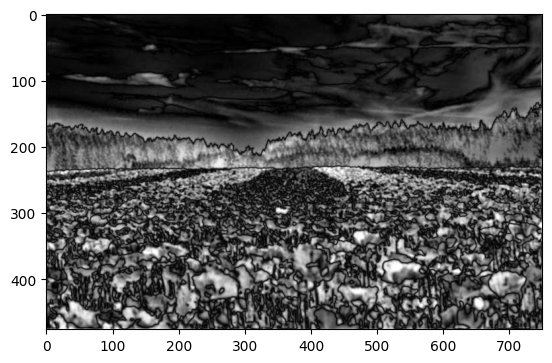

In [76]:
scaling = 2
edges = np.clip(scaling * np.abs(img - img_mod), 0, 1)
plt.imshow(edges, cmap='gray')

Now combine the edges and the original image linearly, play with different factors and kernel sizes. Store the result in `res`. The resulting image should look a little sharper than the original (not only the blurred!) one.

_Tip:_ You may enlarge a Jupyter matplotlib plot by `plt.subplots(figsize=(18,12))` in front of `imshow` to see the details.

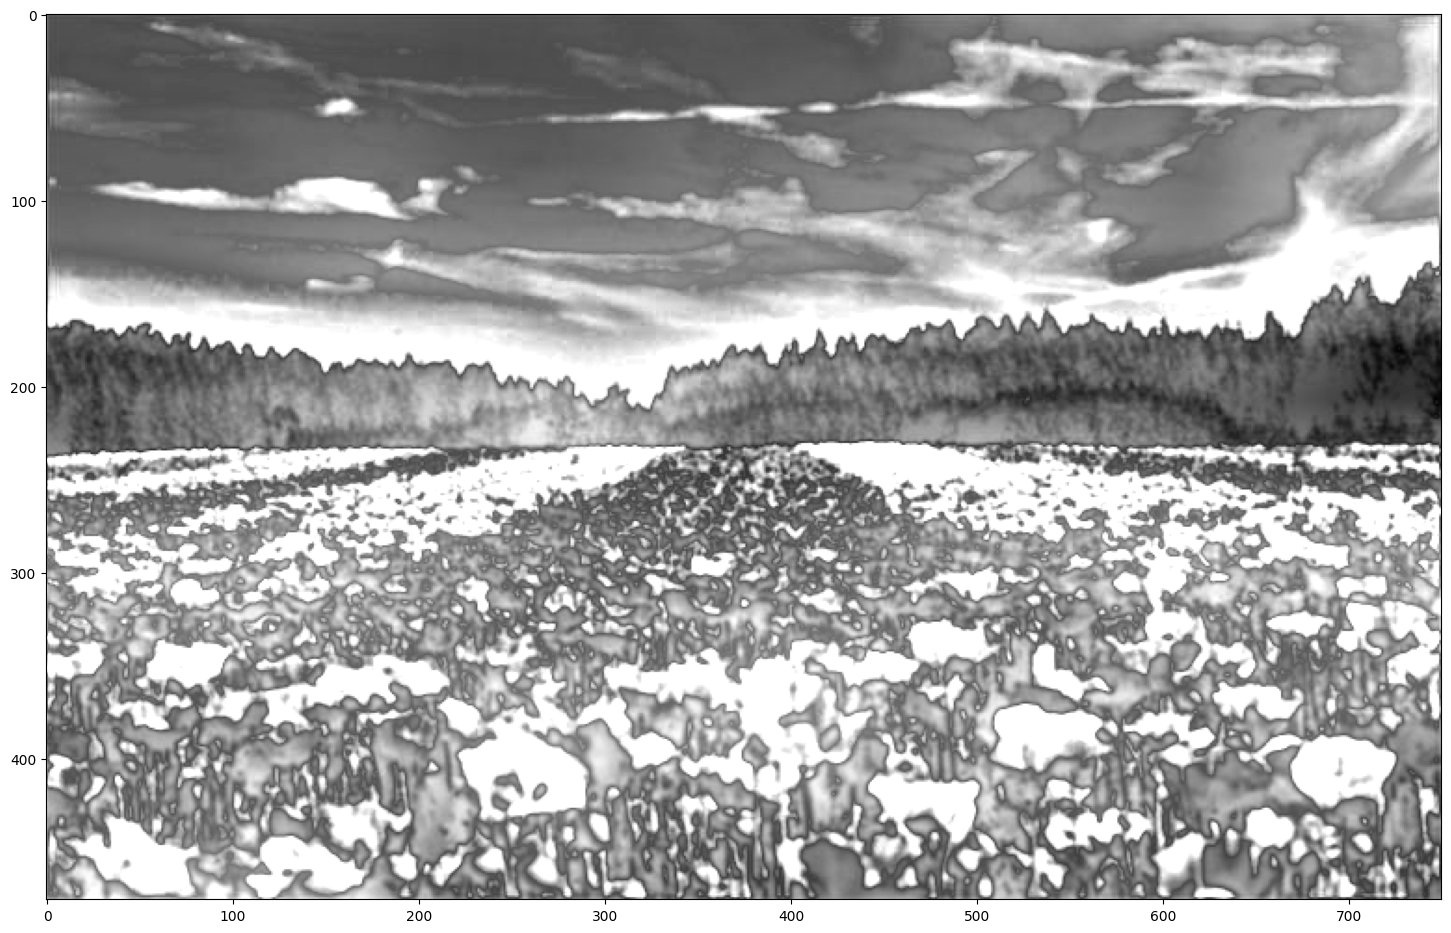

In [79]:
res = img + edges
res = np.clip(res, 0, 1)
plt.subplots(figsize=(18,12))
plt.imshow(res, cmap='gray')